# Simple regression with TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")

In [3]:
X = X[0:5000, :]
y = y[0:5000]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [5]:
from keras import Sequential

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [7]:
n_feat = X_train.shape[1]

In [18]:
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(n_feat,)),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='linear')
])

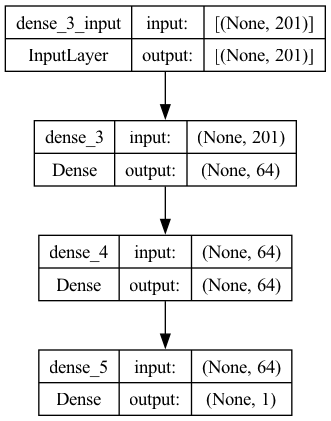

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [20]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [21]:
num_epochs = 20
history = model.fit(X_train, y_train,
                    batch_size = 128, 
                    validation_split = 0.05, 
                    epochs=120)

Epoch 1/120
30/30 [==============================] - 0s 3ms/step - loss: 49.7463 - mae: 6.3176 - val_loss: 49.8608 - val_mae: 6.2772
Epoch 2/120
30/30 [==============================] - 0s 1ms/step - loss: 49.7163 - mae: 6.3180 - val_loss: 49.9245 - val_mae: 6.2803
Epoch 3/120
30/30 [==============================] - 0s 1ms/step - loss: 49.7117 - mae: 6.3165 - val_loss: 49.5788 - val_mae: 6.2632
Epoch 4/120
30/30 [==============================] - 0s 1ms/step - loss: 49.6716 - mae: 6.3152 - val_loss: 50.0814 - val_mae: 6.2874
Epoch 5/120
30/30 [==============================] - 0s 1ms/step - loss: 49.7361 - mae: 6.3165 - val_loss: 49.8336 - val_mae: 6.2757
Epoch 6/120
30/30 [==============================] - 0s 1ms/step - loss: 49.6909 - mae: 6.3148 - val_loss: 49.7374 - val_mae: 6.2707
Epoch 7/120
30/30 [==============================] - 0s 1ms/step - loss: 49.6935 - mae: 6.3154 - val_loss: 49.5448 - val_mae: 6.2620
Epoch 8/120
30/30 [==============================] - 0s 1ms/step - lo

In [22]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0)

In [23]:
test_mse_score

50.551612854003906

In [24]:
y_hat = model.predict(X_test)

32/32 [==============================] - 0s 363us/step


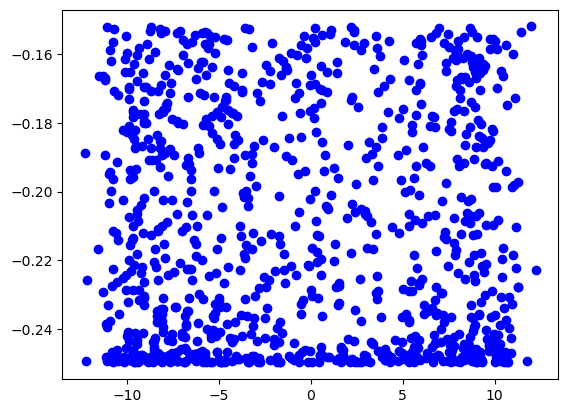

In [25]:
plt.plot(y_test, y_hat, 'bo')